In [16]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('./dataset.csv', sep=';')

target = df['Цена']

df = df.drop(columns=['Название', 'Код товара', 'Цена', 'Режимы работы', 'Тип двигателя', 'Класс товара'])

scaler = StandardScaler()
columns_to_normalize = df.columns[df.columns != 'Цена']
df[columns_to_normalize] = df.fillna(df[columns_to_normalize].mean())
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [18]:
x, test_x, y, test_y = train_test_split(df, target, train_size=0.7)
train_x, valid_x, train_y, valid_y = train_test_split(x, y, train_size=0.7)

train = [train_x, train_y]
valid = [valid_x, valid_y]
test = [test_x, test_y]

In [19]:
class ErrorModel:
    def __init__(self, method, param):
        self.model = method(param)
            
    def error(self, data):
        pred = self.model.predict(data[0])
        err = mean_squared_error(data[1], pred)
        return err
    
    def fit(self, data_x, data_y):
        self.model.fit(data_x, data_y)
        
    
def run_params(train, valid, test, method, params):
    error_train = []
    error_valid = []
    error_test = []
        
    for param in params:
        model = ErrorModel(method, param)
        model.fit(train[0], train[1]) 

        error_train.append(model.error(train))
        error_valid.append(model.error(valid))
        error_test.append(model.error(test))
        
    return error_train, error_valid, error_test        

def run_and_plot(train, valid, test, method, params):
    error_train, error_valid, error_test = run_params(train, valid, test, method, params)
    plt.plot(params, error_train, 'b', params, error_valid, 'g', params, error_test, 'r')
    plt.show()

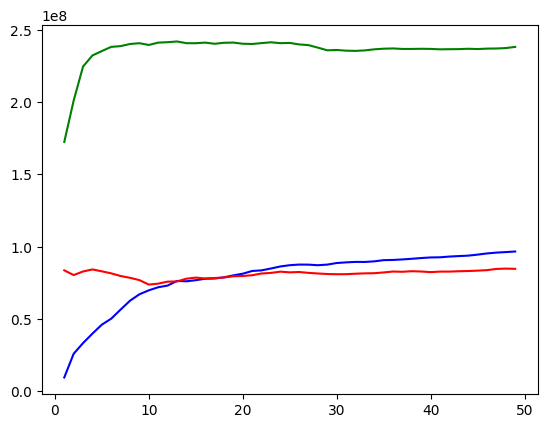

In [20]:
run_and_plot(train, valid, test,
             lambda x: KNeighborsRegressor(n_neighbors=x),
             [i for i in range(1, 50)])

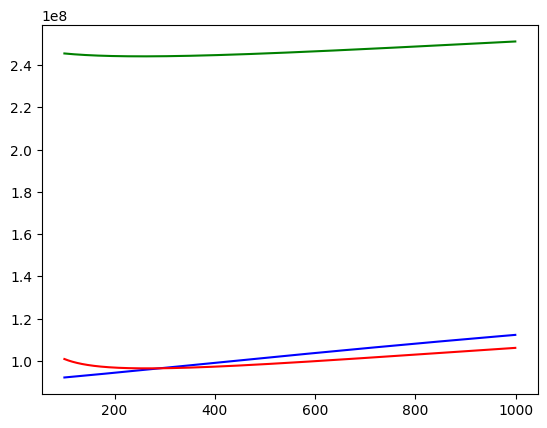

In [21]:
run_and_plot(train, valid, test,
             lambda x: Ridge(alpha=x),
             [i for i in range(100, 1000)])

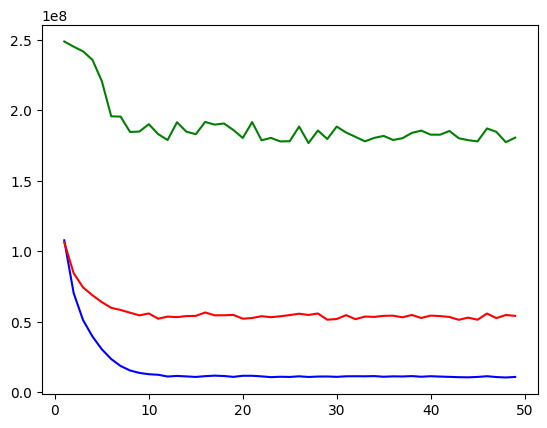

In [22]:
run_and_plot(train, valid, test,
             lambda x: RandomForestRegressor(max_depth=x),
             [i for i in range(1, 50)])

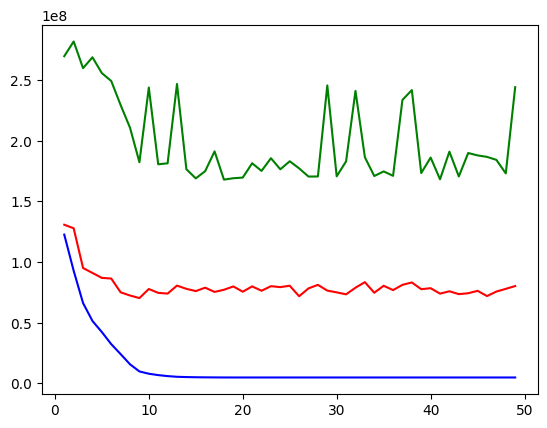

In [23]:
run_and_plot(train, valid, test,
             lambda x: DecisionTreeRegressor(max_depth=x),
             [i for i in range(1, 50)])